In [ ]:
# prompt: read excel file using pandas library into tabular format

import pandas as pd

# Read the Excel file
df = pd.read_excel('ROS.xlsx')

# Print the DataFrame
print(df)


         No.                Time           Source            Destination  \
0          1 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
1          2 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
2          3 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
3          4 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
4          5 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
...      ...                 ...              ...                    ...   
68837  68838 2023-12-09 17:29:44    151.128.81.39         vrrp.mcast.net   
68838  68839 2023-12-09 17:29:44    151.128.81.39         vrrp.mcast.net   
68839  68840 2023-12-09 17:29:44      151.128.1.1  all-systems.mcast.net   
68840  68841 2023-12-09 17:29:44      151.128.1.1  all-systems.mcast.net   
68841  68842 2023-12-09 17:29:44  151.128.152.142            224.0.0.252   

      Protocol  TCP Segment Len      Frame  \
0          ISO              NaN  â\234\22

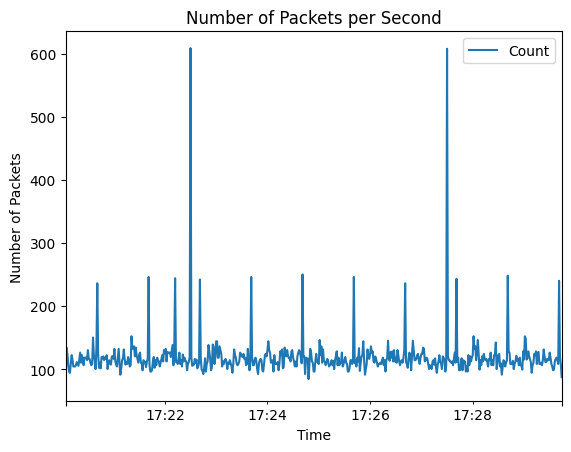

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('ROS.xlsx')


df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')

df['Count'] = 1

df = df.resample('1s').sum()

df.plot(y='Count')
plt.xlabel('Time')
plt.ylabel('Number of Packets')
plt.title('Number of Packets per Second')
plt.show()

In [ ]:
# prompt: whats the average and standard deviation

avg = df['Count'].mean()
std_dev = df['Count'].std()

print(f"Average number of packets per second: {avg}")
print(f"Standard deviation of number of packets per second: {std_dev}")


Average number of packets per second: 118.48881239242685
Standard deviation of number of packets per second: 35.50073280643729


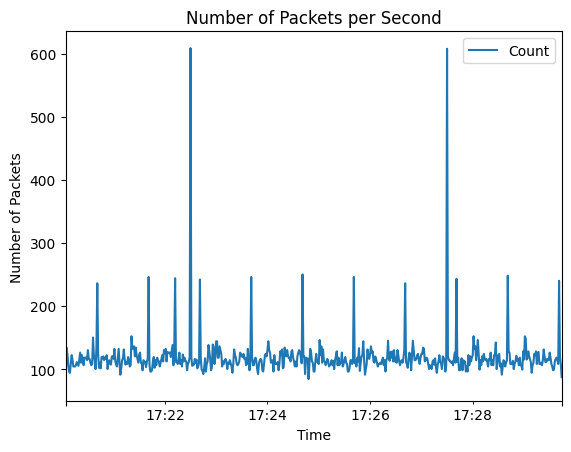

Average number of packets per second: 118.48881239242685
Standard deviation of number of packets per second: 35.50073280643729
Time of packets that exceed the average + standard deviation:
2023-12-09 17:20:41
2023-12-09 17:21:41
2023-12-09 17:22:12
2023-12-09 17:22:30
2023-12-09 17:22:41
2023-12-09 17:23:41
2023-12-09 17:24:41
2023-12-09 17:25:41
2023-12-09 17:26:41
2023-12-09 17:27:30
2023-12-09 17:27:41
2023-12-09 17:28:41
2023-12-09 17:29:41


In [ ]:
# prompt: show the time of the packets that excede the average+standard deviation

import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file
df = pd.read_excel('ROS.xlsx')




df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')

df['Count'] = 1

df = df.resample('1s').sum()

df.plot(y='Count')
plt.xlabel('Time')
plt.ylabel('Number of Packets')
plt.title('Number of Packets per Second')
plt.show()

avg = df['Count'].mean()
std_dev = df['Count'].std()

print(f"Average number of packets per second: {avg}")
print(f"Standard deviation of number of packets per second: {std_dev}")

# Find the time of packets that exceed the average + standard deviation
exceed_times = df[df['Count'] > (avg + std_dev)].index.tolist()

# Print the time of the packets
print("Time of packets that exceed the average + standard deviation:")
for time in exceed_times:
  print(time)


In [ ]:
# prompt: find the number of counts corresponding to the each exceeding time

exceeding_counts = df.loc[exceed_times, 'Count'].tolist()

# Print the number of counts corresponding to each exceeding time
print("Number of counts corresponding to each exceeding time:")
for time, count in zip(exceed_times, exceeding_counts):
  print(f"Time: {time}, Count: {count}")


Number of counts corresponding to each exceeding time:
Time: 2023-12-09 17:20:41, Count: 236
Time: 2023-12-09 17:21:41, Count: 246
Time: 2023-12-09 17:22:12, Count: 244
Time: 2023-12-09 17:22:30, Count: 609
Time: 2023-12-09 17:22:41, Count: 242
Time: 2023-12-09 17:23:41, Count: 246
Time: 2023-12-09 17:24:41, Count: 250
Time: 2023-12-09 17:25:41, Count: 246
Time: 2023-12-09 17:26:41, Count: 236
Time: 2023-12-09 17:27:30, Count: 608
Time: 2023-12-09 17:27:41, Count: 243
Time: 2023-12-09 17:28:41, Count: 248
Time: 2023-12-09 17:29:41, Count: 240


In [ ]:
# prompt: display the corresponding time1 data to the above exceeded time data

# Extract the corresponding time1 data for the exceeding time data
time1_exceeding_data = []
for time in exceed_times:
  # Find the index of the exceeding time in the original DataFrame
  index = df.index.get_loc(time)
  # Extract the corresponding time1 data
  time1_exceeding_data.append(df.iloc[index]['Time1'])

# Print the corresponding time1 data
print("Corresponding time1 data for the exceeded time data:")
for time, time1, count in zip(exceed_times, time1_exceeding_data, exceeding_counts):
  print(f"Time: {time}, Time1: {round(time1/count)}")


Corresponding time1 data for the exceeded time data:
Time: 2023-12-09 17:20:41, Time1: 37
Time: 2023-12-09 17:21:41, Time1: 97
Time: 2023-12-09 17:22:12, Time1: 127
Time: 2023-12-09 17:22:30, Time1: 146
Time: 2023-12-09 17:22:41, Time1: 157
Time: 2023-12-09 17:23:41, Time1: 217
Time: 2023-12-09 17:24:41, Time1: 277
Time: 2023-12-09 17:25:41, Time1: 337
Time: 2023-12-09 17:26:41, Time1: 397
Time: 2023-12-09 17:27:30, Time1: 446
Time: 2023-12-09 17:27:41, Time1: 457
Time: 2023-12-09 17:28:41, Time1: 517
Time: 2023-12-09 17:29:41, Time1: 577


In [ ]:
# prompt: make a list of the above Time1 output and print the list as [37,97,127....517,577]

# Extract the corresponding time1 data for the exceeding time data
time1_exceeding_data = []
for time in exceed_times:
  # Find the index of the exceeding time in the original DataFrame
  index = df.index.get_loc(time)
  # Extract the corresponding time1 data
  time1_exceeding_data.append(df.iloc[index]['Time1'])

# Calculate the rounded time1 values
Time1 = [round(time1/count) for time1, count in zip(time1_exceeding_data, exceeding_counts)]

# Print the list as [37,97,127....517,577]
print(Time1)


[37, 97, 127, 146, 157, 217, 277, 337, 397, 446, 457, 517, 577]


In [ ]:
# prompt: iterate every row of the dataframe df
import pandas as pd

# Read the Excel file
df = pd.read_excel('ROS.xlsx')

# Print the DataFrame
print(df)



         No.                Time           Source            Destination  \
0          1 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
1          2 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
2          3 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
3          4 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
4          5 2023-12-09 17:20:04           F8WP02       Private_00:00:00   
...      ...                 ...              ...                    ...   
68837  68838 2023-12-09 17:29:44    151.128.81.39         vrrp.mcast.net   
68838  68839 2023-12-09 17:29:44    151.128.81.39         vrrp.mcast.net   
68839  68840 2023-12-09 17:29:44      151.128.1.1  all-systems.mcast.net   
68840  68841 2023-12-09 17:29:44      151.128.1.1  all-systems.mcast.net   
68841  68842 2023-12-09 17:29:44  151.128.152.142            224.0.0.252   

      Protocol  TCP Segment Len      Frame  \
0          ISO              NaN  â\234\22

In [ ]:
# prompt: code to search for Time1=37 and create a dataframe to store all the data

# Filter the DataFrame to only include rows where Time1 is equal to 37
df_time1_37 = df[df['Time1'] == 37]

# Create a new DataFrame to store the filtered data
df_filtered = pd.DataFrame(df_time1_37)

# Print the filtered DataFrame
print(df_filtered)


       No.                Time         Source     Destination Protocol  \
4238  4239 2023-12-09 17:20:41  151.128.81.93  vrrp.mcast.net     VRRP   
4239  4240 2023-12-09 17:20:41  151.128.81.93  vrrp.mcast.net     VRRP   
4240  4241 2023-12-09 17:20:41  151.128.81.39  vrrp.mcast.net     VRRP   
4241  4242 2023-12-09 17:20:41  151.128.81.39  vrrp.mcast.net     VRRP   
4242  4243 2023-12-09 17:20:41  151.128.81.39  vrrp.mcast.net     VRRP   
...    ...                 ...            ...             ...      ...   
4465  4466 2023-12-09 17:20:42         07CP22          ERNW11      ISO   
4466  4467 2023-12-09 17:20:42  151.128.81.93  vrrp.mcast.net     VRRP   
4467  4468 2023-12-09 17:20:42  151.128.81.93  vrrp.mcast.net     VRRP   
4468  4469 2023-12-09 17:20:42  151.128.81.93  vrrp.mcast.net     VRRP   
4469  4470 2023-12-09 17:20:42  151.128.81.93  vrrp.mcast.net     VRRP   

      TCP Segment Len      Frame                       Info  Time1  
4238              NaN  â\234\223          

In [ ]:
# prompt: search for each item in the list time1

for time in Time1:

  print(f"Searching for time: {time}")
  print(df[df['Time1'] == time])




Searching for time: 37
       No.                Time         Source     Destination Protocol  \
4238  4239 2023-12-09 17:20:41  151.128.81.93  vrrp.mcast.net     VRRP   
4239  4240 2023-12-09 17:20:41  151.128.81.93  vrrp.mcast.net     VRRP   
4240  4241 2023-12-09 17:20:41  151.128.81.39  vrrp.mcast.net     VRRP   
4241  4242 2023-12-09 17:20:41  151.128.81.39  vrrp.mcast.net     VRRP   
4242  4243 2023-12-09 17:20:41  151.128.81.39  vrrp.mcast.net     VRRP   
...    ...                 ...            ...             ...      ...   
4465  4466 2023-12-09 17:20:42         07CP22          ERNW11      ISO   
4466  4467 2023-12-09 17:20:42  151.128.81.93  vrrp.mcast.net     VRRP   
4467  4468 2023-12-09 17:20:42  151.128.81.93  vrrp.mcast.net     VRRP   
4468  4469 2023-12-09 17:20:42  151.128.81.93  vrrp.mcast.net     VRRP   
4469  4470 2023-12-09 17:20:42  151.128.81.93  vrrp.mcast.net     VRRP   

      TCP Segment Len      Frame                       Info  Time1  
4238              N

In [ ]:
for time in Time1:
  time_37_df = df[df['Time1'] == time]

# Group the filtered DataFrame by 'Protocol' and count occurrences
  protocol_counts = time_37_df.groupby('Protocol')['Protocol'].count()

# Print the results
  print(f"Different types of protocol for time {time} and their occurrences:")
  print(protocol_counts)

Different types of protocol for time 37 and their occurrences:
Protocol
IGMPv2     14
ISO       140
NBNS        6
STP         2
VRRP       70
Name: Protocol, dtype: int64
Different types of protocol for time 97 and their occurrences:
Protocol
ARP         2
IGMPv2     10
ISO       134
STP         2
VRRP       70
Name: Protocol, dtype: int64
Different types of protocol for time 127 and their occurrences:
Protocol
IGMPv2     12
ISO       156
STP         2
VRRP       70
Name: Protocol, dtype: int64
Different types of protocol for time 146 and their occurrences:
Protocol
ARP       242
IGMPv2     16
ISO        26
NBNS        6
SNMP      240
VRRP       70
Name: Protocol, dtype: int64
Different types of protocol for time 157 and their occurrences:
Protocol
IGMPv2      8
ISO       136
LLMNR       2
STP         2
VRRP       70
Name: Protocol, dtype: int64
Different types of protocol for time 217 and their occurrences:
Protocol
ARP         2
IGMPv2     10
ISO       140
NBNS       12
STP         2

In [ ]:
for time in Time1:
  time_37_df = df[df['Time1'] == time]

  # Group the filtered DataFrame by 'Protocol' and count occurrences
  protocol_counts = time_37_df.groupby('Protocol')['Protocol'].count()

  # Find the protocol with the highest count
  most_frequent_protocol = protocol_counts.idxmax()
  count = protocol_counts.max()

  print(f"For time {time}, the most frequent protocol is {most_frequent_protocol} with {count} occurrences.")

For time 37, the most frequent protocol is ISO with 140 occurrences.
For time 97, the most frequent protocol is ISO with 134 occurrences.
For time 127, the most frequent protocol is ISO with 156 occurrences.
For time 146, the most frequent protocol is ARP with 242 occurrences.
For time 157, the most frequent protocol is ISO with 136 occurrences.
For time 217, the most frequent protocol is ISO with 140 occurrences.
For time 277, the most frequent protocol is ISO with 144 occurrences.
For time 337, the most frequent protocol is ISO with 144 occurrences.
For time 397, the most frequent protocol is ISO with 142 occurrences.
For time 446, the most frequent protocol is ARP with 240 occurrences.
For time 457, the most frequent protocol is ISO with 156 occurrences.
For time 517, the most frequent protocol is ISO with 166 occurrences.
For time 577, the most frequent protocol is ISO with 152 occurrences.


In [ ]:
for time in Time1:
  time_df = df[df['Time1'] == time]

  # Group the filtered DataFrame by 'Protocol' and count occurrences
  protocol_counts = time_df.groupby('Protocol')['Protocol'].count()

  # Sort the protocol counts in descending order
  sorted_counts = protocol_counts.sort_values(ascending=False)

  # Check if there are at least two protocols
  if len(sorted_counts) >= 2:
    # Get the most and second most frequent protocols
    most_frequent_protocol = sorted_counts.index[0]
    second_most_frequent_protocol = sorted_counts.index[1]

    # Get the counts for the most and second most frequent protocols
    most_frequent_count = sorted_counts.iloc[0]
    second_most_frequent_count = sorted_counts.iloc[1]

    print(f"For time {time}:")
    print(f"  Most frequent protocol: {most_frequent_protocol} ({most_frequent_count} times)")
    print(f"  Second most frequent protocol: {second_most_frequent_protocol} ({second_most_frequent_count} times)")
  else:
    print(f"For time {time}, there are less than two protocols.")

For time 37:
  Most frequent protocol: ISO (140 times)
  Second most frequent protocol: VRRP (70 times)
For time 97:
  Most frequent protocol: ISO (134 times)
  Second most frequent protocol: VRRP (70 times)
For time 127:
  Most frequent protocol: ISO (156 times)
  Second most frequent protocol: VRRP (70 times)
For time 146:
  Most frequent protocol: ARP (242 times)
  Second most frequent protocol: SNMP (240 times)
For time 157:
  Most frequent protocol: ISO (136 times)
  Second most frequent protocol: VRRP (70 times)
For time 217:
  Most frequent protocol: ISO (140 times)
  Second most frequent protocol: VRRP (70 times)
For time 277:
  Most frequent protocol: ISO (144 times)
  Second most frequent protocol: VRRP (70 times)
For time 337:
  Most frequent protocol: ISO (144 times)
  Second most frequent protocol: VRRP (70 times)
For time 397:
  Most frequent protocol: ISO (142 times)
  Second most frequent protocol: VRRP (70 times)
For time 446:
  Most frequent protocol: ARP (240 times)


In [ ]:

broadcast_df = df[df['Destination'] == 'Broadcast']

# Print the filtered DataFrame
print(broadcast_df)


         No.                Time            Source Destination Protocol  \
154      155 2023-12-09 17:20:05            RHWP02   Broadcast      ARP   
155      156 2023-12-09 17:20:05            RHWP02   Broadcast      ARP   
164      165 2023-12-09 17:20:05            ERAW11   Broadcast      ARP   
165      166 2023-12-09 17:20:05            ERAW11   Broadcast      ARP   
435      436 2023-12-09 17:20:07            RHWP02   Broadcast      ARP   
...      ...                 ...               ...         ...      ...   
68633  68634 2023-12-09 17:29:42  Private_c0:01:24   Broadcast      ISO   
68717  68718 2023-12-09 17:29:43  Private_c0:01:24   Broadcast      ISO   
68718  68719 2023-12-09 17:29:43  Private_c0:01:24   Broadcast      ISO   
68817  68818 2023-12-09 17:29:44  Private_c0:01:24   Broadcast      ISO   
68818  68819 2023-12-09 17:29:44  Private_c0:01:24   Broadcast      ISO   

       TCP Segment Len      Frame  \
154                NaN  â\234\223   
155                NaN  â

In [ ]:
# Group the broadcast DataFrame by 'Source' and count occurrences
source_counts = broadcast_df.groupby('Source')['Source'].count()

# Sort the source counts in descending order
sorted_counts = source_counts.sort_values(ascending=False)

# Check if there are at least two sources
if len(sorted_counts) >= 2:
  # Get the most and second most frequent sources
  most_frequent_source = sorted_counts.index[0]
  second_most_frequent_source = sorted_counts.index[1]

  # Get the counts for the most and second most frequent sources
  most_frequent_count = sorted_counts.iloc[0]
  second_most_frequent_count = sorted_counts.iloc[1]

  print("In broadcast DataFrame:")
  print(f"  Most frequent source: {most_frequent_source} ({most_frequent_count} times)")
  print(f"  Second most frequent source: {second_most_frequent_source} ({second_most_frequent_count} times)")
else:
  print("In broadcast DataFrame, there are less than two sources.")


In broadcast DataFrame:
  Most frequent source: Private_c0:01:24 (276 times)
  Second most frequent source: ERAW11 (270 times)


In [ ]:
# prompt: create a dataframe for destination equal to vrrp.mcast.net

vrrp_df = df[df['Destination'] == 'vrrp.mcast.net']

# Print the filtered DataFrame
print(vrrp_df)


         No.                Time         Source     Destination Protocol  \
10        11 2023-12-09 17:20:04  151.128.81.93  vrrp.mcast.net     VRRP   
11        12 2023-12-09 17:20:04  151.128.81.93  vrrp.mcast.net     VRRP   
12        13 2023-12-09 17:20:04  151.128.81.39  vrrp.mcast.net     VRRP   
13        14 2023-12-09 17:20:04  151.128.81.39  vrrp.mcast.net     VRRP   
14        15 2023-12-09 17:20:04  151.128.81.39  vrrp.mcast.net     VRRP   
...      ...                 ...            ...             ...      ...   
68834  68835 2023-12-09 17:29:44  151.128.81.93  vrrp.mcast.net     VRRP   
68835  68836 2023-12-09 17:29:44  151.128.81.39  vrrp.mcast.net     VRRP   
68836  68837 2023-12-09 17:29:44  151.128.81.39  vrrp.mcast.net     VRRP   
68837  68838 2023-12-09 17:29:44  151.128.81.39  vrrp.mcast.net     VRRP   
68838  68839 2023-12-09 17:29:44  151.128.81.39  vrrp.mcast.net     VRRP   

       TCP Segment Len      Frame               Info  Time1  
10                 NaN  â

In [ ]:
# Group the vrrp DataFrame by 'Source' and count occurrences
source_counts = vrrp_df.groupby('Source')['Source'].count()

# Sort the source counts in descending order
sorted_counts = source_counts.sort_values(ascending=False)

# Check if there are at least two sources
if len(sorted_counts) >= 2:
  # Get the most and second most frequent sources
  most_frequent_source = sorted_counts.index[0]
  second_most_frequent_source = sorted_counts.index[1]

  # Get the counts for the most and second most frequent sources
  most_frequent_count = sorted_counts.iloc[0]
  second_most_frequent_count = sorted_counts.iloc[1]

  print("In VRRP DataFrame:")
  print(f"  Most frequent source: {most_frequent_source} ({most_frequent_count} times)")
  print(f"  Second most frequent source: {second_most_frequent_source} ({second_most_frequent_count} times)")
else:
  print("In VRRP DataFrame, there are less than two sources.")


In VRRP DataFrame:
  Most frequent source: 151.128.81.93 (29026 times)
  Second most frequent source: 151.128.81.39 (11760 times)
